**import all libraries and packages**

In [1]:
# pip install gdown

In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import seaborn as sns
import gdown
import requests
import pandas as pd
import io
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
np.random.seed(42)

#function that sets the seed for the random number generator

#to ensure that the random number generator will produce the same

##sequence of numbers every time the code is run.


**open data**

In [4]:

file_id = '134ciV7bFv7mytUSbkfkB7fct_DH6SXY4'

url = f'https://drive.google.com/uc?export=download&id={file_id}'

response = requests.get(url)

if response.status_code == 200:

    df = pd.read_csv(io.StringIO(response.text))

    print("good")
else:
    print(f"Failed to download file, status code: {response.status_code}")


good


In [5]:
df.sample(1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
1501,61907.59335,7.017838,6.440256,3.25,43828.94721,1339096.077,"7521 Gregory Meadows\nEast Johntown, CO 93230-..."


In [6]:
df.shape

(5000, 7)

In [7]:
data= pd.DataFrame(df)

In [8]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [9]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


**df EDA**

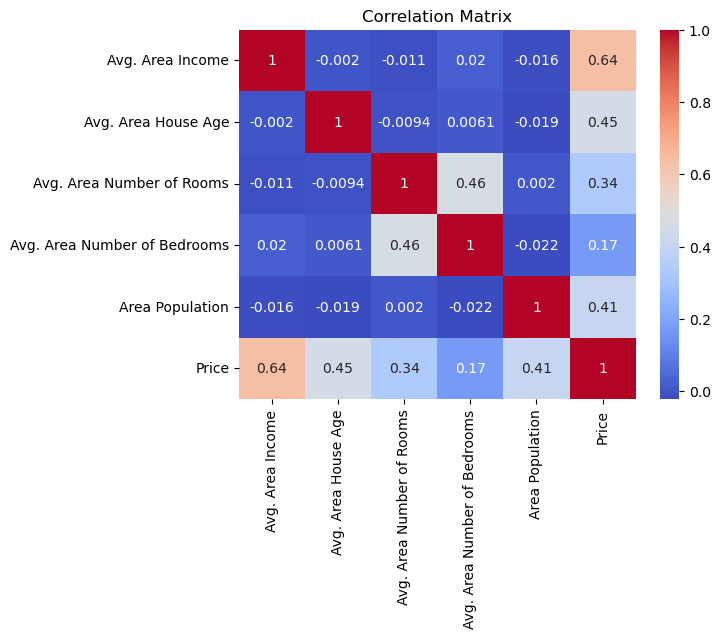

In [10]:
numerical_df = data.select_dtypes(include=np.number)

correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()

In [11]:
pd.DataFrame(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


""


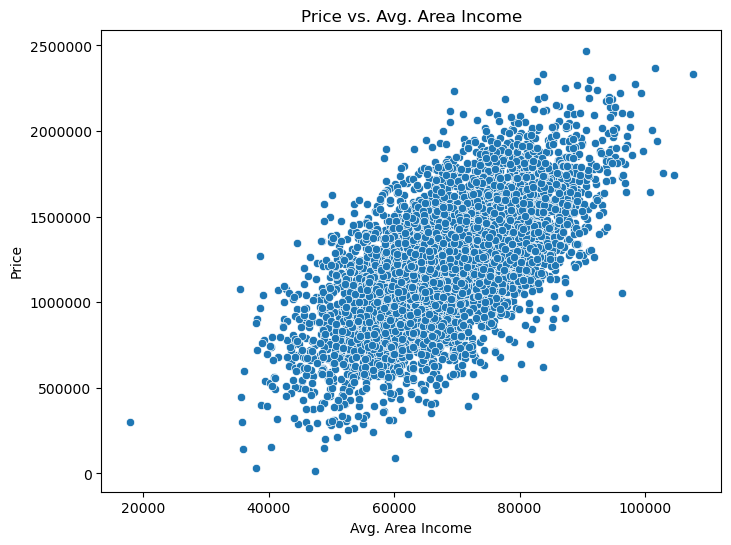

In [12]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='Avg. Area Income', y='Price', data=data)

plt.title('Price vs. Avg. Area Income')

plt.xlabel('Avg. Area Income')

plt.ylabel('Price')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [13]:
data.Price=data.Price.astype(int)

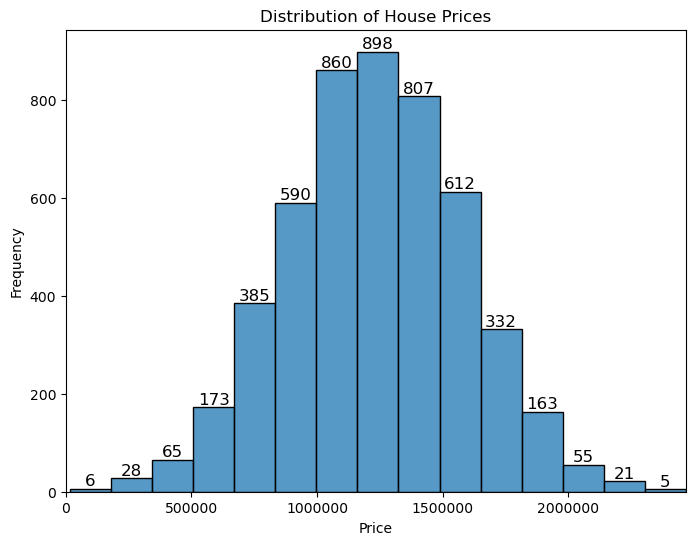

In [14]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data['Price'], bins=15)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, data.Price.max())
plt.ticklabel_format(style='plain', axis='x')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

**most of the values around 1M to 1.5M as house price**

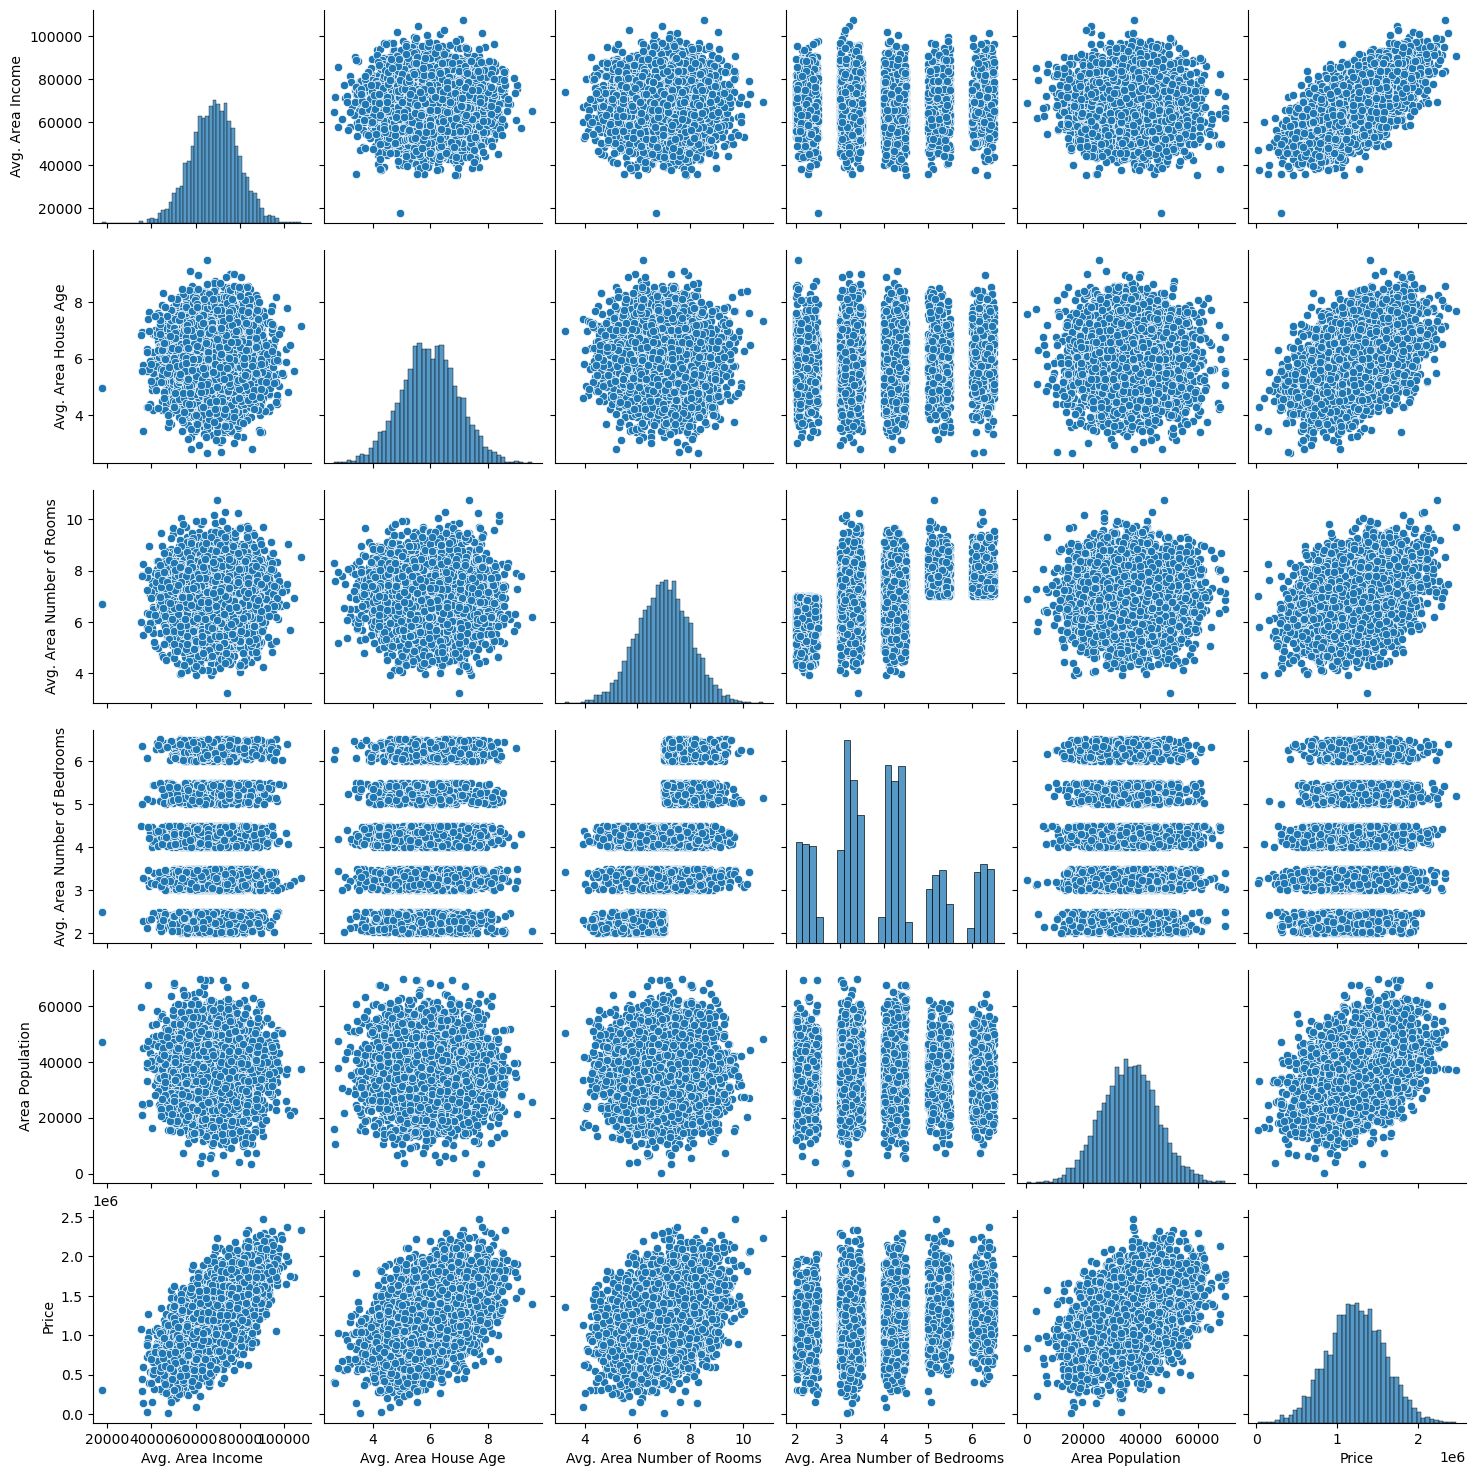

In [15]:
sns.pairplot(data)

plt.show()

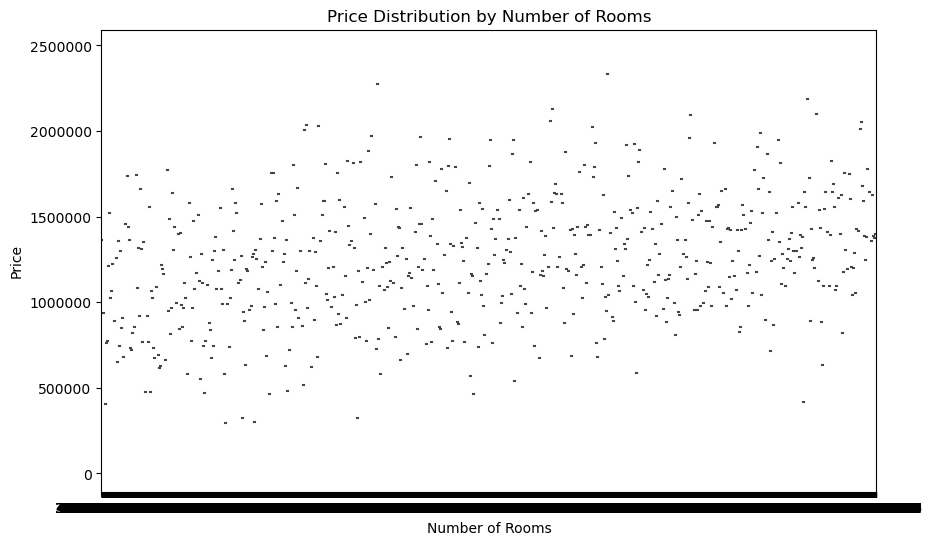

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Avg. Area Number of Rooms', y='Price', data=data)
plt.title('Price Distribution by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**prices are scattering with given val of rooms**

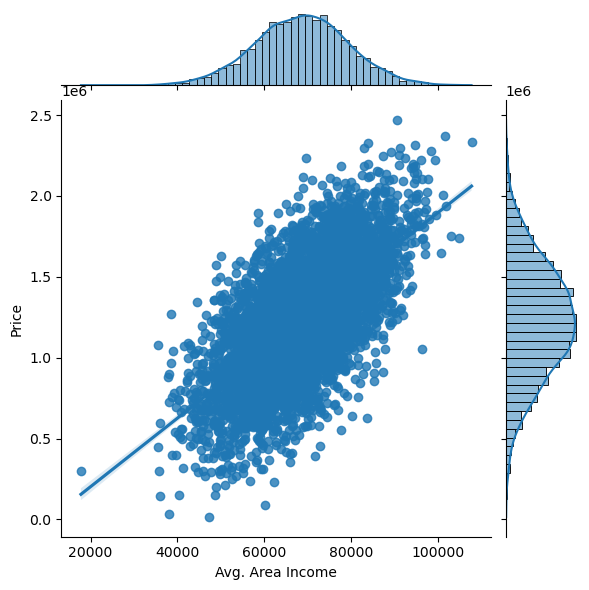

In [17]:
sns.jointplot(x='Avg. Area Income', y='Price', data=data, kind='reg')
plt.show()

In [18]:
data.sample()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
1078,75764.20019,4.83767,6.59212,2.38,36712.20014,1337966,"97282 Moore Knoll Suite 107\nWest Megan, AS 39..."


In [19]:
# Calculate average price by area
data['AvgPriceByArea'] = data['Price'] / data['Avg. Area Income']

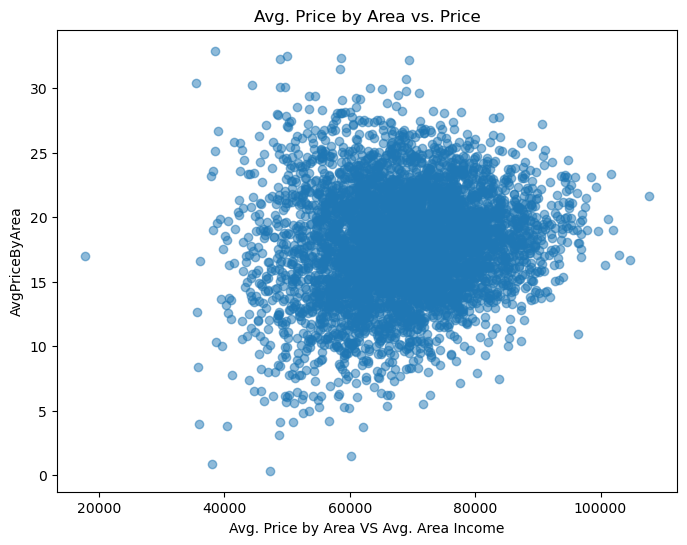

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter( data['Avg. Area Income']  , data['AvgPriceByArea'], alpha=0.5)  # alpha for transparency
plt.title('Avg. Price by Area vs. Price')
plt.xlabel('Avg. Price by Area VS Avg. Area Income')
plt.ylabel('AvgPriceByArea')
plt.show()

In [21]:
X = data.drop(['Price', 'Address'], axis=1)

# Drop target and 'Address'
y = data['Price']

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42) # Or XGBRegressor


In [23]:
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df.head(10).style.background_gradient(cmap='Blues')

,Feature,Importance
5,AvgPriceByArea,0.734123
0,Avg. Area Income,0.263992
4,Area Population,0.000505
1,Avg. Area House Age,0.000480
2,Avg. Area Number of Rooms,0.000476
3,Avg. Area Number of Bedrooms,0.000424



Avg. Area Income: Most important. Strongly influences house prices.
Avg. Area House Age: Second most important. Affects price, but less than income.
Area Population: Also important, likely due to demand and market factors.
Avg. Area Number of Rooms: Moderately important. Larger houses tend to cost more.
Avg. Area Number of Bedrooms: Least important of those listed.
Summary:

The model mostly relies on income, house age, and area population to predict prices, with room count having a moderate effect.

**Split to train and test**

In [24]:
X = data.drop('Price', axis=1)  # Features

y = data['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

In [25]:
X_train.sample()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address,AvgPriceByArea
2038,52122.95431,6.599764,7.910269,3.04,38764.82093,"1345 Chavez Canyon\nLake Alexander, IN 90097",23.441246


In [26]:
y_train.sample()

169    1007478
Name: Price, dtype: int32

In [27]:
X_train = X_train.drop('Address', axis=1)

X_test = X_test.drop('Address', axis=1)

turn X to tensors


In [28]:
import torch
from sklearn.preprocessing import StandardScaler  # If you want to scale data

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)


In [29]:
random_indices = torch.randint(0, X_train_tensor.shape[0], size=(3,))

X_train_tensor[random_indices]


tensor([[6.6262e+04, 6.2923e+00, 4.9237e+00, 4.2300e+00, 4.5055e+04, 1.8097e+01],
        [7.0473e+04, 6.0102e+00, 6.1102e+00, 3.2400e+00, 3.4894e+04, 1.7953e+01],
        [8.0431e+04, 5.4749e+00, 6.3226e+00, 4.0500e+00, 3.4616e+04, 1.6169e+01]])

In [30]:
random_indices2 = torch.randint(0, y_test_tensor.shape[0], size=(3,))

y_test_tensor[random_indices2]


tensor([[1074824.],
        [ 677277.],
        [1428693.]])

In [31]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

input_dim = X_train.shape[1]
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


lr stands for learning rate.
It controls how much the model's weights are adjusted during training.
lr=0.001 means a small learning rate:
Smaller updates to weights.
Slower but more stable training.
Less risk of missing the optimal solution.
In short, it's like taking small, careful steps to find the best solution for your model.

In [32]:


X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)


In [33]:

# 1. Feature Scaling (including target variable)
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# 2. Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

# 3. Create a validation set
X_train_tensor, X_val_tensor, y_train_tensor, y_val_tensor = train_test_split(
    X_train_tensor, y_train_tensor, test_size=0.2, random_state=42
)

In [ ]:


# 4. Define the model with a hidden layer
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

input_dim = X_train_scaled.shape[1]
hidden_dim = 64  # You can experiment with different values
output_dim = 1
model = LinearRegressionModel(input_dim, hidden_dim, output_dim)


In [34]:

# 5. Weight Initialization
for m in model.modules():
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

# 6. Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Reduced learning rate

# 7. Training loop with early stopping
epochs = 1000000
patience = 10  # Number of epochs to wait for improvement
patience_counter = 0
best_val_loss = float('inf')

train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    train_losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        model.eval()
        with torch.no_grad():
            y_pred_val = model(X_val_tensor)
            val_loss = criterion(y_pred_val, y_val_tensor)
            val_losses.append(val_loss.item())

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print("Early stopping triggered!")
                    break

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# 8. Evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    test_loss = criterion(y_pred_test, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Epoch [100/1000000], Loss: 0.0424
Epoch [200/1000000], Loss: 0.0184
Epoch [300/1000000], Loss: 0.0079
Epoch [400/1000000], Loss: 0.0046
Epoch [500/1000000], Loss: 0.0037
Epoch [600/1000000], Loss: 0.0033
Epoch [700/1000000], Loss: 0.0029
Epoch [800/1000000], Loss: 0.0025
Epoch [900/1000000], Loss: 0.0022
Epoch [1000/1000000], Loss: 0.0020
Epoch [1100/1000000], Loss: 0.0018
Epoch [1200/1000000], Loss: 0.0017
Epoch [1300/1000000], Loss: 0.0015
Epoch [1400/1000000], Loss: 0.0014
Epoch [1500/1000000], Loss: 0.0013
Epoch [1600/1000000], Loss: 0.0012
Epoch [1700/1000000], Loss: 0.0011
Epoch [1800/1000000], Loss: 0.0010
Epoch [1900/1000000], Loss: 0.0009
Epoch [2000/1000000], Loss: 0.0009
Epoch [2100/1000000], Loss: 0.0008
Epoch [2200/1000000], Loss: 0.0008
Epoch [2300/1000000], Loss: 0.0007
Epoch [2400/1000000], Loss: 0.0007
Epoch [2500/1000000], Loss: 0.0006
Epoch [2600/1000000], Loss: 0.0006
Epoch [2700/1000000], Loss: 0.0005
Epoch [2800/1000000], Loss: 0.0005
Epoch [2900/1000000], Loss: 0

In [35]:
from sklearn.preprocessing import StandardScaler

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

In [36]:
class LinearRegressionModel(nn.Module):
       def __init__(self, input_dim, hidden_dim, output_dim):
           super(LinearRegressionModel, self).__init__()
           self.linear1 = nn.Linear(input_dim, hidden_dim)
           self.relu = nn.ReLU()  # Activation function
           self.linear2 = nn.Linear(hidden_dim, output_dim)

       def forward(self, x):
           out = self.linear1(x)
           out = self.relu(out)
           out = self.linear2(out)
           return out

input_dim = X_train.shape[1]
hidden_dim = 64  # You can experiment with different values
output_dim = 1
model = LinearRegressionModel(input_dim, hidden_dim, output_dim)

In [37]:
for m in model.modules():
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test_tensor.cpu().numpy(), y_pred_test.cpu().numpy())
mae = mean_absolute_error(y_test_tensor.cpu().numpy(), y_pred_test.cpu().numpy())

print(f'Test MSE: {mse:.6f}')
print(f'Test MAE: {mae:.6f}')

Test MSE: 0.000032
Test MAE: 0.003961


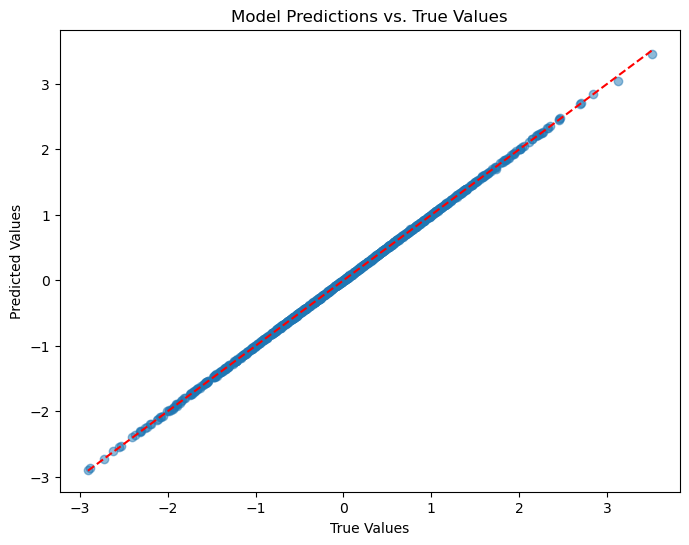

In [40]:


plt.figure(figsize=(8, 6))
plt.scatter(y_test_tensor.cpu().numpy(), y_pred_test.cpu().numpy(), alpha=0.5)
plt.plot([y_test_tensor.cpu().numpy().min(), y_test_tensor.cpu().numpy().max()],
         [y_test_tensor.cpu().numpy().min(), y_test_tensor.cpu().numpy().max()],
         color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs. True Values')
plt.show()

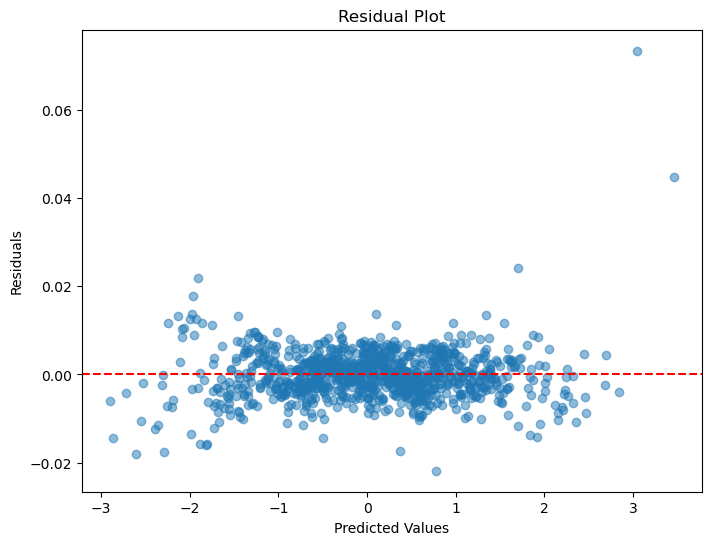

In [41]:

residuals = y_test_tensor.cpu().numpy() - y_pred_test.cpu().numpy()
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test.cpu().numpy(), residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()